<a href="https://colab.research.google.com/github/mrFahrenhiet/Fake-News-Detector/blob/master/facke_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from nltk.tokenize import RegexpTokenizer,WordPunctTokenizer,word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [200]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
df1 = pd.read_csv("/content/drive/My Drive/Dataset/f1data.csv")

In [202]:
df1['text'] = df1['text']+df1['place']
df1 = df1.drop(['Unnamed: 0','Unnamed: 0.1','date','day','filename','id','keywords','link','month','place'],axis=1)
df1.shape

(146413, 4)

In [203]:
df1.head(n=5)

,flag,publisher,year,text
0,0,TOI,2018.0,NAGPUR: Villagers in Naxalite infested Gadchir...
1,0,TOI,2017.0,KOLHAPUR: Robbers continue to give sleepless n...
2,0,TOI,2018.0,"HUBBALLI: An iconic building, which is propose..."
3,0,TOI,2017.0,MUMBAI: MNS chief said that the would lead...
4,0,TOI,2017.0,UDAIPUR: Several mud houses collapsed and doze...


In [204]:
df1 = df1.drop(['publisher','year'],axis=1)
df1

,flag,text
0,0,NAGPUR: Villagers in Naxalite infested Gadchir...
1,0,KOLHAPUR: Robbers continue to give sleepless n...
2,0,"HUBBALLI: An iconic building, which is propose..."
3,0,MUMBAI: MNS chief said that the would lead...
4,0,UDAIPUR: Several mud houses collapsed and doze...
...,...,...
146408,0,VADODARA/ANAND: Two plants growing in abundanc...
146409,0,NOIDA/BEIJING: Production at Oppo’s Noida pl...
146410,0,CHANDIGARH: A block development panchayat offi...
146411,0,MANGALURU: As many as 95 species of winged bea...


In [0]:
dfF = df1[df1['flag']==1]

In [0]:
dfR = df1[df1['flag']==0][:2500]

In [0]:
frames = [dfF,dfR]
res = pd.concat(frames)
data = res.values

In [0]:
np.random.shuffle(data)

In [208]:
data.shape

(3117, 2)

In [209]:
X = data[:,1]
X

array(['THIRUVANANTHAPURAM:   across the state is likely to get   peak hours, till Sunday. \n\n The state electricity board had been exercising selective restrictions in power supply from 6:30pm to 10pm since Thursday after there was a shortage of 400 MW power following issues in   power evacuation line and   in Thalcher  . KSEB has announced small scale power restrictions during peak hours to circumvent the unexpected dip in the power from outside the state. \n \nthiruvananthapuram',
       'PUNE: Ola drivers, who had been protesting against the faulty policies of the management for the past two days, called off their strike late on Wednesday following acceptance of their demands. Uber drivers, who had also joined in the strike, decided to continue with their agitation though their representatives are likely to meet MNS leaders on Thursday.\n\n An Ola spokesperson said that it had decided to accept some of the demands of drivers like taking back terminated drivers after police verific

In [0]:
Y = data[:,0]

In [211]:
Y = np.array(Y,dtype='int32')
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [0]:
ps = PorterStemmer()
sw = set(stopwords.words('english'))
sw.remove('not')
sw.remove('no')
sw.add('\n')
def data_cleaner(text):
  text = text.lower()
  tokenizer = RegexpTokenizer('[A-z]+')
  word_list = tokenizer.tokenize(text)
  clean_list = [w for w in word_list if w not in sw]
  stemmed_list = [ps.stem(w) for w in clean_list]
  clean_text = ' '.join(stemmed_list)
  return clean_text

In [0]:
X_clean = [data_cleaner(sent) for sent in X]

In [214]:
X_clean[0]

'thiruvananthapuram across state like get peak hour till sunday state electr board exercis select restrict power suppli pm pm sinc thursday shortag mw power follow issu power evacu line thalcher kseb announc small scale power restrict peak hour circumv unexpect dip power outsid state thiruvananthapuram'

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X_clean,Y)

In [0]:
cv = TfidfVectorizer()

In [0]:
df3 = pd.read_csv("/content/drive/My Drive/Dataset/Fake.csv")
df4 = pd.read_csv("/content/drive/My Drive/Dataset/True.csv")

In [184]:
fra = [df3,df4]
mix = pd.concat(fra)
mix.shape

(44898, 4)

In [0]:
Yf = np.ones((df3.shape[0],))
Yr = np.zeros((df4.shape[0],))

In [0]:
Y_new = np.hstack((Yf,Yr))

In [195]:
Y_new

array([1., 1., 1., ..., 0., 0., 0.])

In [196]:
mix.tail(n=2)

,title,text,subject,date
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [198]:
Y_new[Y_new.shape[0]-2:]

array([0., 0.])

In [0]:
mix['text'] = mix['title']+mix['text']+mix['subject']
mix = mix.drop(['title','subject','date'],axis=1)

In [0]:
X_new = mix.values
X_new = X_new.reshape((X_new.shape[0],))

In [0]:
X_new_clean = [data_cleaner(sent) for sent in X_new]

In [0]:
X_vec = cv.transform(X_clean)

In [0]:
Y = np.hstack((Y_new,Y))

In [0]:
X_c = np.hstack((X_new_clean,X_clean))

In [241]:
X_c.shape

(48015,)

In [242]:
Y.shape

(48015,)

In [0]:
X_vec = cv.fit_transform(X_c)

In [0]:
mnb = MultinomialNB()

In [245]:
mnb.fit(X_vec,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [246]:
mnb.score(X_vec,Y)

0.9416224096636467

In [0]:
X_tvec = cv.transform(X_test)

In [248]:
mnb.score(X_tvec,Y_test)

0.8589743589743589

In [0]:
pred = mnb.predict(X_tvec)

In [250]:
np.unique(pred,return_counts=True)

(array([0., 1.]), array([668, 112]))

In [251]:
Y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
report = classification_report(Y_test,pred,target_names = ['0','1'])

In [253]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       624
           1       0.71      0.51      0.59       156

    accuracy                           0.86       780
   macro avg       0.80      0.73      0.75       780
weighted avg       0.85      0.86      0.85       780



In [254]:
cm = confusion_matrix(Y_test,pred)
print(cm)

[[591  33]
 [ 77  79]]


In [255]:
print("FOR TESTING DATA")
print("False Positive: ",cm[0,1])
print("False Negetive: ",cm[1,0])

FOR TESTING DATA
False Positive:  33
False Negetive:  77


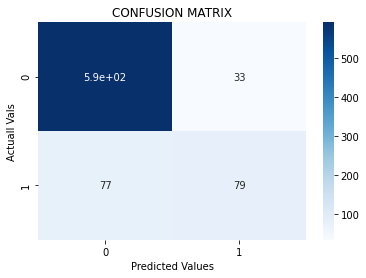

In [256]:
sns.heatmap(cm,xticklabels=[0,1],cmap=plt.cm.Blues,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actuall Vals")
plt.title("CONFUSION MATRIX")
plt.show()

In [257]:
cross_val_score(mnb,X_vec,Y,cv=5,scoring='accuracy').mean()

0.8866395917942309

In [258]:
df9 = pd.read_csv("/content/drive/My Drive/Dataset/fndata.csv")
df9.shape

(53, 1)

In [259]:
f = np.ones((df9.shape[0],))
f = np.array(f,dtype='int32')
f

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
testX = df9.values

In [0]:
testX = testX.reshape((-1,))

In [263]:
testX.shape

(53,)

In [264]:
testX.shape

(53,)

In [0]:
testX_clean = [data_cleaner(sent) for sent in testX]

In [0]:
testX_vec = cv.transform(testX_clean)

In [0]:
pred = mnb.predict(testX_vec)

In [268]:
pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0.])

In [270]:
mnb.score(testX_vec,f)

0.6037735849056604

In [271]:
report = classification_report(f,pred,target_names = ['0','1'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75        53

    accuracy                           0.60        53
   macro avg       0.50      0.30      0.38        53
weighted avg       1.00      0.60      0.75        53

